In [ ]:
"""
-meta: Meta-data for the file. This is basic information such as the GPS times covered, which instrument, etc.
-quality: Refers to data quality. The main item here is a 1 Hz time series describing the data quality for each 
second of data. This is an important topic, and we'll devote a whole step of the tutorial to working with data quality information.
-strain: Strain data from the interferometer. In some sense, this is "the data", the main measurement performed by LIGO. 
"""
#el eje x es meta>GPSstart
#el eje y es strain>strain 

In [29]:
import numpy as np 
import pandas as pd
import h5py
import matplotlib.pyplot as plt

In [30]:
hdf5_path = fileName = 'L-L1_GWOSC_O2_4KHZ_R1-1185669120-4096.hdf5'

In [31]:
with h5py.File(hdf5_path, 'r') as hdf:
    ls = list(hdf.keys()) #tiene llaves cada archivo 
    print('List of datasets in this file: \n', ls)

List of datasets in this file: 
 ['meta', 'quality', 'strain']


In [32]:
#contenido de strain
with h5py.File(hdf5_path, 'r') as hdf:
    key_strain = list(hdf.keys())[2]
    data_strain = list(hdf[key_strain])
print("Data in strain: ", data_strain)

Data in strain:  ['GWOSCmeta', 'Strain']


In [33]:
#contenido de meta
#gpsstart
#GPSstart es el tiempo, eje x 
with h5py.File(hdf5_path, 'r') as hdf:
    key_meta = list(hdf.keys())[0]
    data_meta = list(hdf[key_meta]) 
print("Data in meta: ", data_meta)

Data in meta:  ['Description', 'DescriptionURL', 'Detector', 'Duration', 'FrameType', 'GPSstart', 'Observatory', 'StrainChannel', 'Type', 'UTCstart']


In [34]:
#contenido de quality
with h5py.File(hdf5_path, 'r') as hdf:
    key_quality = list(hdf.keys())[1]
    data_quality = list(hdf[key_quality]) 
print("Data in quality: ", data_quality)

Data in quality:  ['detail', 'injections', 'simple']


In [35]:
#contenido 
dataFile = h5py.File(fileName, 'r')

In [42]:
strain = dataFile['strain']['Strain'][()]
#time sample (tiempo de muestreo)
ts = dataFile['strain']['Strain'].attrs['Xspacing']

In [44]:
metaKeys = dataFile['meta'].keys()
meta = dataFile['meta']
gpsStart = meta['GPSstart'][()]
duration = meta['Duration'][()]
gpsEnd   = gpsStart + duration
time = np.arange(gpsStart, gpsEnd, ts)
#strain_content = dataFile['strain']
#strain = (strain_content[key][()])

In [45]:
print('Strain Shape: ',strain.shape)
print('Time Shape: ',time.shape)
print("Time sample: ", ts)
print("metaKey: ",metaKeys)
print("meta: ",meta)
print ('gpsStart: ',gpsStart)
print ("gpsEnd: ",gpsEnd)

Strain Shape:  (16777216,)
Time Shape:  (16777216,)
Time sample:  0.000244140625
metaKey:  <KeysViewHDF5 ['Description', 'DescriptionURL', 'Detector', 'Duration', 'FrameType', 'GPSstart', 'Observatory', 'StrainChannel', 'Type', 'UTCstart']>
meta:  <HDF5 group "/meta" (10 members)>
gpsStart:  1185669120
gpsEnd:  1185673216


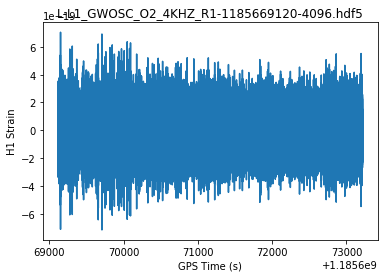

In [47]:
plt.plot(time, strain)
plt.title(fileName)
plt.xlabel('GPS Time (s)')
plt.ylabel('H1 Strain')
plt.show()